<a href="https://colab.research.google.com/github/jhchang/Sentiment-Analysis-on-Arabic-Text/blob/main/arabic-dialect-code-switch-profiler/02_baseline_models_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Baseline Machine Learning Models

## 📚 Table of Contents
- Intro
- Preprocessing
- Model 1: MLP
- Model 2: Naive Bayes
- Model 3: Support Vector Machine (SVM)
- Results & Analysis

---

In this notebook, we implement and evaluate a series of simple but effective machine learning models for the task of Arabic dialect and code-switch classification.

Following our data exploration and preprocessing, our goal today is to establish strong classical baselines that future deep learning models can be compared against.

### ✅ Objectives:
- Convert Arabic text into numeric features using **TF-IDF vectorization**.
- Train and evaluate:
  - A **Multilayer Perceptron (MLP)**
  - A **Naïve Bayes** classifier
  - A **Linear Support Vector Machine (SVM)**
- Record performance metrics and identify strengths/weaknesses of each model.

These classical models are computationally efficient, interpretable, and often surprisingly strong on short-text classification tasks, especially when paired with effective preprocessing.


In [25]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import zipfile
from tqdm import tqdm
import os

zip_path = "/content/drive/MyDrive/datasets/MADAR-SHARED-TASK-final-release-25Jul2019.zip"
extract_to = "/content/MADAR/"

# Count the total number of files in the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    total_files = len(zip_ref.infolist())

    print(f"📦 Unzipping {total_files} files to {extract_to}...")

    with tqdm(total=total_files, unit="files") as pbar:
        for file in zip_ref.infolist():
            zip_ref.extract(member=file, path=extract_to)
            pbar.update(1)

print("✅ Unzip complete!")

📦 Unzipping 54 files to /content/MADAR/...


100%|██████████| 54/54 [00:00<00:00, 132.91files/s]

✅ Unzip complete!


In [27]:
import pandas as pd

# Replace with your file path
file_path = "/content/MADAR/MADAR-SHARED-TASK-final-release-25Jul2019/MADAR-Shared-Task-Subtask-1/MADAR-Corpus-26-train.tsv"
file_path2 = "/content/MADAR/MADAR-SHARED-TASK-final-release-25Jul2019/MADAR-Shared-Task-Subtask-1/MADAR-Corpus-26-dev.tsv"
file_path3 = "/content/MADAR/MADAR-SHARED-TASK-final-release-25Jul2019/MADAR-Shared-Task-Subtask-1/MADAR-Corpus-26-test.tsv"

# Read TSV file into a DataFrame
train_df = pd.read_csv(file_path, sep='\t', header=None, names=['text', 'dialect'])
val_df = pd.read_csv(file_path2, sep='\t', header=None, names=['text', 'dialect'])
test_df = pd.read_csv(file_path3, sep='\t', header=None, names=['text', 'dialect'])

# Preview
train_df.head()


,text,dialect
0,هناك ، أمام بيانات السائح تماما .,MSA
1,لم اسمع بهذا العنوان من قبل بالقرب من هنا .,MSA
2,استمر في السير في هذا الطريق حتى تجد صيدلية .,MSA
3,كم تكلفة الإفطار ؟,MSA
4,كيف أستطيع مساعدتك ؟,MSA


In [28]:
val_df.head()

,text,dialect
0,بالمناسبة ، اسمي هيروش إيجيما .,MSA
1,"هذا القطار يتوقف في لاك فورست , أليس كذلك ؟",MSA
2,"هذا الكارت , حسناً ؟",MSA
3,لم يخرج من الماكينة شيء .,MSA
4,عندك أية شيء يمكن أن أتعاطه للطفح الجلدي ؟,MSA


In [29]:
test_df.head()

,text,dialect
0,لا أعرف كثيراً عن النبيذ ؟ ماذا يناسب هذا الطبق ؟,MSA
1,رايح عالمدرسة هون ؟,DAM
2,قهوه مع كريمة و سكر ، لوسمحت .,SAN
3,بأي محطة لازم أنزل عشان أروح على امباير ستيت ب...,AMM
4,اسمي ميتشيكو تاناكا ، ورقم الرحلة خمسة صفر واح...,JED


# Preprocessing and consistency

Embeddings for popular transformers models are designed to be used on text from the OpenAI wider dataset which contain stopwords.

Now, stopwords are rarely removed. We can remove stopwords for more simple models however, I do not recommend removing them for more advanced models. For the sake of consistency and testing basic model performance against state of the art models, I will not preprocess data for simple models.

The first notebook in this series and the introduction to NLP in Arabic that is in the same repo, covers how to do data analysis and preprocessing in depth. This is a good practice to be familiar with because if you are designing your own models, you might have to make preprocessing and embedding layers yourself.


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['label_id'] = le.fit_transform(train_df['dialect'])  # Integers
train_df['label_name'] = train_df['dialect']                  # Strings

# Save mapping if needed later
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

val_df['label_id'] = val_df['dialect'].replace(label_mapping)
val_df['label_name'] = val_df['dialect']

test_df['label_id'] = test_df['dialect'].replace(label_mapping)
test_df['label_name'] = test_df['dialect']

print(label_mapping)  # e.g., {'MSA': 0, 'RIY': 1, 'BEI': 2, ...}
# print(train_df['label_id'])
# print(val_df['label_id'])
# print(test_df['label_id'])

{'ALE': np.int64(0), 'ALG': np.int64(1), 'ALX': np.int64(2), 'AMM': np.int64(3), 'ASW': np.int64(4), 'BAG': np.int64(5), 'BAS': np.int64(6), 'BEI': np.int64(7), 'BEN': np.int64(8), 'CAI': np.int64(9), 'DAM': np.int64(10), 'DOH': np.int64(11), 'FES': np.int64(12), 'JED': np.int64(13), 'JER': np.int64(14), 'KHA': np.int64(15), 'MOS': np.int64(16), 'MSA': np.int64(17), 'MUS': np.int64(18), 'RAB': np.int64(19), 'RIY': np.int64(20), 'SAL': np.int64(21), 'SAN': np.int64(22), 'SFX': np.int64(23), 'TRI': np.int64(24), 'TUN': np.int64(25)}


<ipython-input-30-b1ae40d1bf58>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val_df['label_id'] = val_df['dialect'].replace(label_mapping)
<ipython-input-30-b1ae40d1bf58>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['label_id'] = test_df['dialect'].replace(label_mapping)


## ❓ Integer Labels

There are times when mapping strings to integers is helpful or required, depending on your workflow.

| Scenario                                                                      | Why integers are needed                                    |
| ----------------------------------------------------------------------------- | ---------------------------------------------------------- |
| Using `scikit-learn` models                                                   | Estimators like `LogisticRegression` expect integer labels |
| Computing metrics manually                                                    | Many metric functions expect numeric input                 |
| Saving labels for confusion matrices or exporting results                     | Integer labels simplify post-processing                    |
| Training with sparse targets (e.g., `SparseCategoricalCrossentropy`) in Keras | It requires integers (not one-hot or string labels)        |

While many imported model loaders can accept string labels, it is usually good practice to have a mapping for scenarios where you need integer labels.

I will also not be using stanza to process text for simple models for several reasons:

- Stanza increases overhead and run time
- Stanza would only be used on the simple models that will quickly be replaced by state of the art models

# 🔬 Model: MLP + TF-IDF head

### 1. TF-IDF
We are using TF-IDF to transform out text into high dimensional space. This will allow our model more features to work with for adjusting weights in our model to fit the training data. You can learn more about TF-IDF here: https://en.wikipedia.org/wiki/Tf%E2%80%93idf .

### 2. Data Preprocessing:
For this simple model we also opted not to use Stanza or word embeddings for faster run times and since state of the art models don't use them, we won't spend our time adjusting a base model to those accomodate those augmentations.

### 3. Model hyperparameters
We have one input layer, one hidden layer with 64 nodes, and one softmax classification output layer. Softmax is a logistic regression layer and you can relate this to the first model we did in the notebook from the previous NLP series that I wrote (https://colab.research.google.com/drive/1gPpfgd1Xy-54XLIlzYHVm3JvMrFM4Wr6?usp=sharing).

We use the popular Rectified Linear Unit (ReLU) activation function in this model for several key reasons:

 1. **Sparsity and Efficiency**:
   - ReLU outputs zero for all negative inputs, which can lead to sparsity in activations (many neurons output zero). This can make the network more efficient and reduce computation, as only a subset of neurons is active at a time.

 2. **Avoids Vanishing Gradient Problem**:
   - Unlike sigmoid or tanh, ReLU does not saturate for positive inputs (gradient is always 1 for \( x > 0 \)), which helps mitigate the vanishing gradient problem in deep networks. This allows for more stable and faster training.

 3. **Computationally Simple**:
   - ReLU is computationally cheap—just a max operation (\( \text{max}(0, x) \))—compared to sigmoid or tanh, which involve exponentials or divisions.

 4. **Faster Convergence**:
   - Due to its linearity for positive inputs, ReLU often leads to faster convergence during training compared to saturating activation functions.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X_train = vectorizer.fit_transform(train_df['text']).toarray()
X_val = vectorizer.transform(val_df['text']).toarray()

# Labels (assumes integer labels)
y_train = to_categorical(train_df['label_id'].values)
y_val = to_categorical(val_df['label_id'].values)

# Keras model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2757 - loss: 2.8836 - val_accuracy: 0.5396 - val_loss: 1.6010
Epoch 2/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6015 - loss: 1.4380 - val_accuracy: 0.5712 - val_loss: 1.3348
Epoch 3/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6808 - loss: 1.0675 - val_accuracy: 0.5760 - val_loss: 1.2825
Epoch 4/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7235 - loss: 0.8894 - val_accuracy: 0.5781 - val_loss: 1.2939
Epoch 5/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7570 - loss: 0.7665 - val_accuracy: 0.5777 - val_loss: 1.3240
Epoch 6/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7792 - loss: 0.6756 - val_accuracy: 0.5763 - val_loss: 1.3778
Epoch 7/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7963 - loss: 0.6189 - val_accuracy: 0.5765 - val_loss: 1.4297
Epoch 8/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8056 - loss: 0.5746 - 

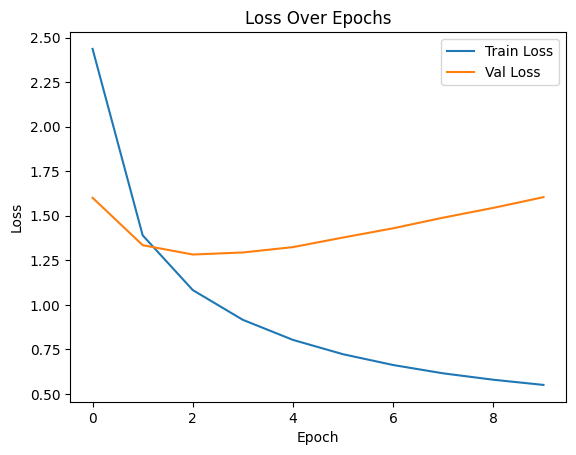

In [32]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# # Accuracy
# plt.plot(history.history['accuracy'], label='Train Acc')
# plt.plot(history.history['val_accuracy'], label='Val Acc')
# plt.legend()
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.show()


##🧠 Analyzing Accuracy
🎯 Accuracy
- We can see that our average validation accuracy is 57% which is not bad for a simple model. With a T4 gpu the model could train over the dataset in under 2 minutes.

⚠ Validation loss increases
- The graph of validation loss increasing by the second epoch is concerning. Even if the training loss decreases over each epoch, validation loss increasing at the same time means that our model is quickly learning to overfit on our data.

## 🤔 Solutions for overfitting?

✅ 1. Add Dropout

Dropout helps regularize the model and prevent overfitting.

✅ 2. Add L2 Regularization

This penalizes large weights and encourages generalization.

✅ 3. Use Early Stopping

Stop training before the model begins overfitting.

✅ 4. Consider Reducing Feature Size

We are using max_features=10000. Try reducing it to 5000 or 3000:

✅ 5. Increase ngram_range

Much higher feature count, risk of overfitting.

But watch out:

- Feature explosion: (1,3) introduces a lot more n-grams.

- You may need to cut max_features to 5000 or 7000 to control dimensionality.

---
**Note**: Since the model isn't performing well and still overfitting. We should also try adding additional layers and nodes.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X_train = vectorizer.fit_transform(train_df['text']).toarray()
X_val = vectorizer.transform(val_df['text']).toarray()

# Labels (assumes integer labels)
y_train = to_categorical(train_df['label_id'].values)
y_val = to_categorical(val_df['label_id'].values)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_val, y_val), callbacks=[early_stop])


Epoch 1/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2132 - loss: 2.9706 - val_accuracy: 0.4713 - val_loss: 2.0692
Epoch 2/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4458 - loss: 2.1112 - val_accuracy: 0.4896 - val_loss: 1.9541
Epoch 3/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4869 - loss: 1.9630 - val_accuracy: 0.5090 - val_loss: 1.8951
Epoch 4/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5078 - loss: 1.9030 - val_accuracy: 0.5123 - val_loss: 1.8859
Epoch 5/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5243 - loss: 1.8386 - val_accuracy: 0.5117 - val_loss: 1.8636
Epoch 6/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5353 - loss: 1.7979 - val_accuracy: 0.5152 - val_loss: 1.8637
Epoch 7/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5475 - loss: 1.7568 - val_accuracy: 0.5240 - val_loss: 1.8539
Epoch 8/20
650/650 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5558 - loss: 1.7407 - val_accuracy: 0.

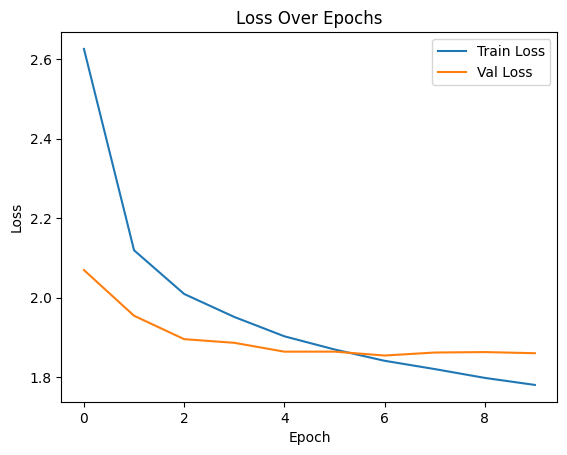

In [34]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

##Final analysis of Results of MLP
After some tries of adjusting hyperparamters of the model and the vectorizer,the model seems to plateau around 55-57% accuracy. While 57% accuracy doesn't seem very high, there are 26 classes so a purely random sample would yield 3.8% accuracy. This simple MLP model might just not be suited to the task of identifying key characteristics of Arabic dialects. Let's try other models after the confusion matrix.

## Confustion Matrix and Classification Report

In [35]:
import numpy as np

# If y_val is mistakenly one-hot, convert back to integers
if len(y_val.shape) > 1 and y_val.shape[1] > 1:
    y_val_int = np.argmax(y_val, axis=1)
else:
    y_val_int = y_val  # already correct


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# Predict class indices
val_probs = model.predict(X_val)
val_preds = np.argmax(val_probs, axis=1)  # Shape: (num_samples,)

# ✅ Use integer labels, not one-hot encoded
cm = confusion_matrix(y_val_int, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.keys())




163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
# Classification report
print(classification_report(y_val_int, val_preds, target_names=label_mapping.keys()))



              precision    recall  f1-score   support

         ALE       0.53      0.54      0.54       200
         ALG       0.66      0.64      0.65       200
         ALX       0.68      0.67      0.67       200
         AMM       0.50      0.32      0.39       200
         ASW       0.51      0.51      0.51       200
         BAG       0.57      0.47      0.51       200
         BAS       0.53      0.50      0.51       200
         BEI       0.63      0.51      0.56       200
         BEN       0.46      0.64      0.53       200
         CAI       0.44      0.40      0.42       200
         DAM       0.64      0.34      0.44       200
         DOH       0.46      0.53      0.49       200
         FES       0.61      0.53      0.56       200
         JED       0.44      0.51      0.47       200
         JER       0.35      0.57      0.43       200
         KHA       0.62      0.55      0.58       200
         MOS       0.64      0.64      0.64       200
         MSA       0.62    

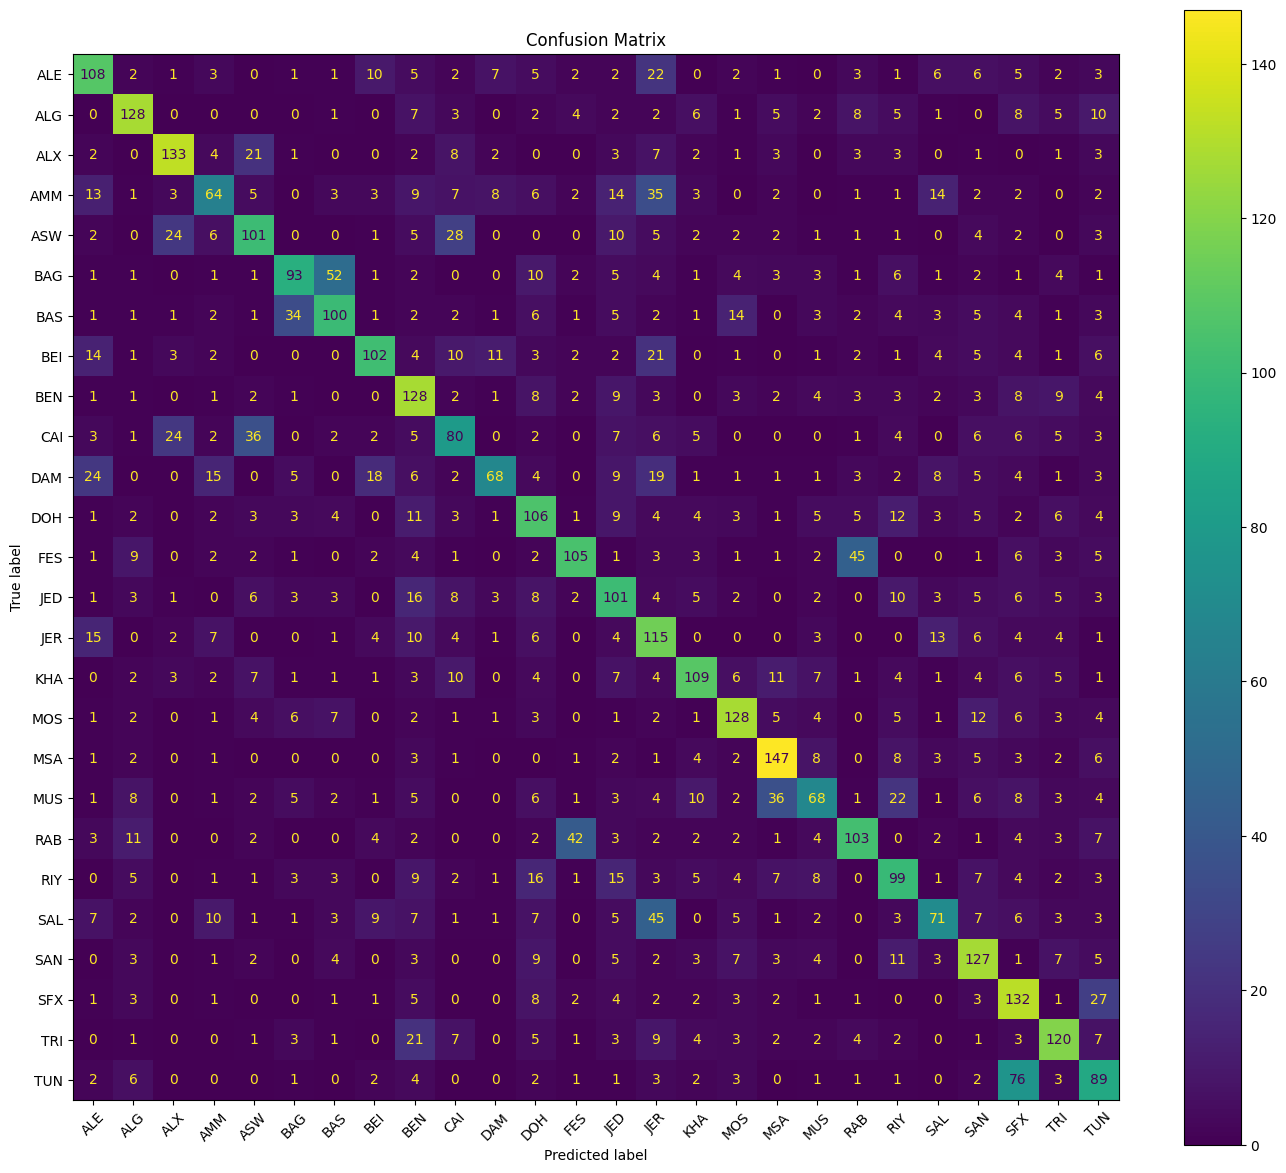

In [38]:
# Confustion Matrix
fig, ax = plt.subplots(figsize=(14, 12))  # You can increase size here
disp.plot(ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

🔢 Analyzing the Confustion Matrix
- As a data analyst, I could explore why there is a high correlation in detecting certain dialects with one another. **Note**: keep in mind that this is only text data so dialects are only detected based on the types of words that are used, where they are used, how often they are used, how often they are paired with other words, etc. ML models can learn the underlying structure of what makes each written dialect unique!

Here is a table for the mapping city Acronyms to the entire city names.


| **Country** | **City**   | **Code** |      | **Country**  | **City**  | **Code** |
| ----------- | ---------- | -------- | ---- | ------------ | --------- | -------- |
| Algeria     | Algiers    | ALG      |      | Palestine    | Jerusalem | JER      |
| Morocco     | Rabat      | RAB      |      | Syria        | Beirut    | BEI      |
|             | Fes        | FES      |      |              | Damascus  | DAM      |
| Tunisia     | Tunis      | TUN      |      |              | Aleppo    | ALE      |
|             | Sfax       | SFX      |      |              | Mosul     | MOS      |
| Libya       | Tripoli    | TRI      |      | Iraq         | Baghdad   | BAG      |
|             | Benghazi   | BEN      |      |              | Basra     | BAS      |
| Egypt       | Cairo      | CAI      |      | Saudi Arabia | Riyadh    | RIY      |
|             | Alexandria | ALX      |      |              | Jeddah    | JED      |
|             | Aswan      | ASW      |      | Oman         | Muscat    | MUS      |
| Sudan       | Khartoum   | KHA      |      | Qatar        | Doha      | DOHA     |
| Jordan      | Amman      | AMM      |      | Yemen        | Sanaa     | SAN      |
|             | Salt       | SAL      |      |              |           |          |

We will now try two more simple models: Naive Bayes and SVM

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# 📘 Naive Bayes Classifier

The **Naive Bayes classifier** is a simple and fast probabilistic model that works particularly well for text classification tasks. It is based on applying Bayes’ theorem with the strong (naive) assumption of feature independence.

For this task, we use the **Multinomial Naive Bayes** variant, which is suitable for discrete features like word counts or TF-IDF scores.

### ✅ Pipeline:
- Transform input text using **TF-IDF vectorization** with unigrams and bigrams.
- Train a `MultinomialNB` model on the vectorized training data.
- Evaluate the model on validation data using accuracy and classification report.

Naive Bayes is often used as a strong baseline for text problems, particularly when interpretability and speed are important.


In [40]:
y_train_indices = np.argmax(y_train, axis=1)
y_val_indices = np.argmax(y_val, axis=1)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train_indices)

nb_preds = nb_model.predict(X_val)
print("Naive Bayes Report:")
print(classification_report(y_val_indices, nb_preds))

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51       200
           1       0.68      0.72      0.70       200
           2       0.67      0.70      0.68       200
           3       0.46      0.40      0.43       200
           4       0.43      0.53      0.48       200
           5       0.67      0.47      0.56       200
           6       0.57      0.56      0.57       200
           7       0.62      0.56      0.59       200
           8       0.62      0.60      0.61       200
           9       0.60      0.34      0.44       200
          10       0.58      0.47      0.52       200
          11       0.43      0.52      0.47       200
          12       0.62      0.57      0.59       200
          13       0.58      0.51      0.54       200
          14       0.49      0.51      0.50       200
          15       0.57      0.58      0.57       200
          16       0.60      0.69      0.64       200
       

# ⚙️ Linear Support Vector Machine (SVM)

Support Vector Machines are powerful and well-established models for classification tasks. When used with a **linear kernel**, they are especially effective for high-dimensional spaces such as TF-IDF-transformed text.

In this notebook, we implement a **Linear SVM** using `LinearSVC`, which is optimized for large-scale classification.

### ✅ Pipeline:
- Convert input text to TF-IDF vectors.
- Train a `LinearSVC` model on the training data.
- Predict labels on validation data and evaluate performance.

SVMs are known for their robustness in text classification, often outperforming more complex models in low-data or well-separated scenarios.


In [41]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train_indices)

svm_preds = svm_model.predict(X_val)
print("Linear SVM Report:")
print(classification_report(y_val_indices, svm_preds))


Linear SVM Report:
              precision    recall  f1-score   support

           0       0.60      0.51      0.55       200
           1       0.67      0.67      0.67       200
           2       0.69      0.65      0.67       200
           3       0.45      0.44      0.44       200
           4       0.48      0.50      0.49       200
           5       0.64      0.47      0.54       200
           6       0.48      0.58      0.53       200
           7       0.59      0.57      0.58       200
           8       0.57      0.56      0.56       200
           9       0.48      0.38      0.42       200
          10       0.48      0.47      0.47       200
          11       0.41      0.48      0.44       200
          12       0.51      0.55      0.53       200
          13       0.54      0.46      0.49       200
          14       0.46      0.43      0.45       200
          15       0.55      0.57      0.56       200
          16       0.72      0.65      0.68       200
        

# ☕ Base Model Comparison:

All models used TF-IDF preprocessing

| **Model**       | **Accuracy** |
|-----------------|-------------:|
| MLP             | 57%          |
| Naive Bayes     | 56%          |
| SVM             | 53%          |

We will be comparing and striving to beat the baseline of 57%. Larger models will take longer to train and might require fine-tuning to beat simple base lines. Let us explore more complicated Neural Networks in the next notebook.

